In [26]:
import pandas as pd
import numpy as np

In [2]:
regions = ['AMY','PFC']
celltypes = ['Astro-Epen',
'Immune',
'Neuron',
'OPC-Oligo',
'Vascular']

In [3]:
celltype=celltypes[0]
region=regions[0]

In [103]:
df_hypo = pd.DataFrame()
df_hyper = pd.DataFrame()
dict_res = {}
for region in regions:
    for celltype in celltypes:
        try:
            df_hyper_hypo = pd.read_csv(f'/data2st1/junyi/output/dmr/{region}/{celltype}/dmr_stat.csv')
            hypo_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]<0).sum(axis=0)).T
            hypo_val.index = [f'{celltype}']
            df_hypo = pd.concat([df_hypo, hypo_val], axis=0)
            df_hypo.sort_index(inplace=True)
            df_hypo = df_hypo.T.sort_index().T

            hyper_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]>0).sum(axis=0)).T
            hyper_val.index = [f'{celltype}']
            df_hyper = pd.concat([df_hyper, hyper_val], axis=0)
            df_hyper.sort_index(inplace=True)
            df_hyper = df_hyper.T.sort_index().T
        except FileNotFoundError:
            print(f"File not found for {region} {celltype}.")
            continue

df_hyper_sum = df_hyper.groupby(df_hyper.index).sum()
df_hypo_sum = df_hypo.groupby(df_hypo.index).sum()

File not found for AMY Vascular.
File not found for PFC Vascular.


In [105]:
df_hyper_sum

,Astro-Epen,Immune,Neuron,OPC-Oligo,Vascular
Astro-Epen,0,9,150,1,3
Immune,19,4,170,14,10
Neuron,23,20,0,42,7
OPC-Oligo,1,16,209,0,4


In [104]:
df_hypo_sum

,Astro-Epen,Immune,Neuron,OPC-Oligo,Vascular
Astro-Epen,66,2,1,51,2
Immune,47,38,10,54,13
Neuron,9,9,115,3,4
OPC-Oligo,50,0,0,136,0


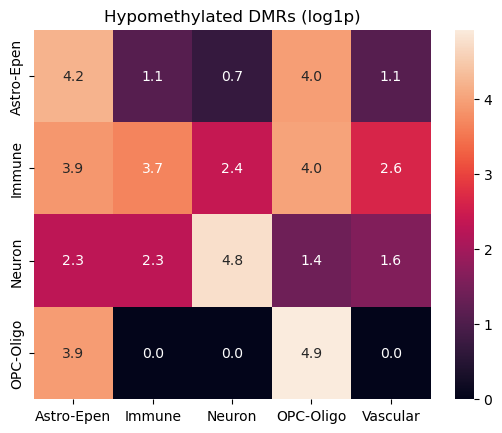

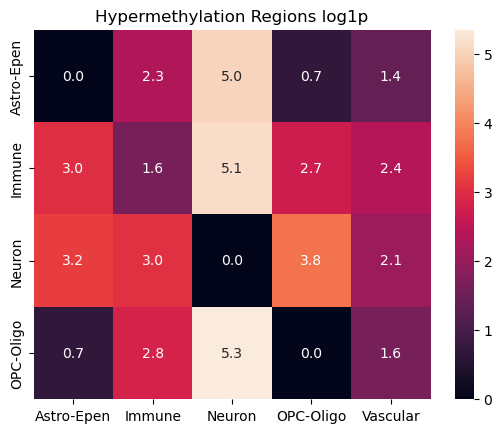

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# 生成随机数据
data = np.random.rand(10, 10)

# 绘制热力图
sns.heatmap(np.log(df_hyper_sum+1), annot=True, fmt=".1f")
plt.title('Hypermethylation Regions log1p')
plt.show()


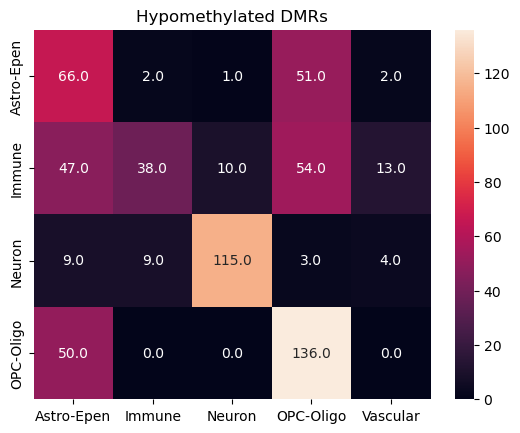

In [137]:
sns.heatmap(df_hypo_sum, annot=True, fmt=".1f")
plt.title('Hypomethylated DMRs')
plt.show()

In [43]:
region = 'PFC'
df_hypo = pd.DataFrame()
df_hyper = pd.DataFrame()
for celltype in celltypes:
    try:
        df_hyper_hypo = pd.read_csv(f'/data2st1/junyi/output/dmr/{region}/{celltype}/dmr_stat.csv')
        hypo_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]<0).sum(axis=0)).T
        hypo_val.index = [f'{region}_{celltype}']
        df_hypo = pd.concat([df_hypo, hypo_val], axis=0)

        hyper_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]>0).sum(axis=0)).T
        hyper_val.index = [f'{region}_{celltype}']
        df_hyper = pd.concat([df_hyper, hyper_val], axis=0)
    except FileNotFoundError:
        print(f"File not found for {region} {celltype}.")
        continue

File not found for PFC Vascular.


In [45]:
df_hypo

,Neuron,Astro-Epen,Vascular,Immune,OPC-Oligo
PFC_Astro-Epen,1,39,0,0,22
PFC_Immune,10,18,8,21,8
PFC_Neuron,66,6,3,4,3
PFC_OPC-Oligo,0,29,0,0,77


In [46]:
df_hyper

,Neuron,Astro-Epen,Vascular,Immune,OPC-Oligo
PFC_Astro-Epen,67,0,3,5,1
PFC_Immune,69,10,7,2,11
PFC_Neuron,0,12,7,12,16
PFC_OPC-Oligo,103,1,3,13,0
